# Project 4: Expectation Maximization (EM) for Document Clustering

## I MLE Formulations for Document Clustering

## Notation

- $N$: Total number of documents  
- $K$: Number of clusters  
- $A$: Vocabulary set (dictionary)  
- $d_n$: The $n$-th document  
- $z_n$: Cluster assignment vector for $d_n$, where $z_{nk} = 1$ if $d_n$ belongs to cluster $k$, otherwise 0  
- $c(w, d_n)$: Count of word $w \in A$ in document $d_n$  
- $\phi_k$: Prior probability of cluster $k$  
- $\mu_{k,w}$: Probability of word $w$ in cluster $k$  
- $\theta = \{ \phi_k, \mu_k \}_{k=1}^K$: All model parameters  
- $\hat{\theta}$: MLE estimate of parameters
- $\gamma(z_{n,k})$: The posterior probabilities(responsibility) that document $n$ belongs to cluster $k$  

---

### Complete Data Case

In the **complete data** scenario, we are given the documents $\{d_1, \ldots, d_N\}$ and the corresponding latent variables $\{z_1, \ldots, z_N\}$, where $z_n := (z_{n1}, \ldots, z_{nK})$ is the cluster assignment vector for the $n$th document in which $z_{nk} = 1$ if this document belongs to cluster $k$ and zero otherwise.

The **likelihood function** for complete data is:

$p(d_1, z_1, \ldots, d_N, z_N) = \prod_{n=1}^{N} \prod_{k=1}^{K} \left( \phi_{k_n} \prod_{w \in A} \mu_{k_n,w}^{c(w,d)} \right)^{z_{nk}}$

The **log-likelihood function** for complete data is:–

$\ln p(d_1, z_1, \ldots, d_N, z_N) = \sum_{n=1}^{N} \sum_{k=1}^{K} z_{nk} \left( \ln \phi_{k_n} + \sum_{w \in A} c(w,d) \ln \mu_{k_n,w} \right)$

**MLE Optimization Problem (Complete Data):**
$\hat{\theta} = \arg\max_{\theta} \ln p(d_1, z_1, \ldots, d_N, z_N)$

$= \arg\max_{\theta} \sum_{n=1}^{N} \sum_{k=1}^{K} z_{nk} \left( \ln \phi_{k_n} + \sum_{w \in A} c(w,d) \ln \mu_{k_n,w} \right)$

### Incomplete Data Case

In practice, the document clusters are not given to us, so $z_n$ is latent. The **likelihood function** for incomplete data (observed documents only) is:

$p(d_1, \ldots, d_N) = \prod_{n=1}^{N} p(d_n) = \prod_{n=1}^{N} \sum_{k=1}^{K} p(z_{nk} = 1, d_n)$

$= \prod_{n=1}^{N} \sum_{k=1}^{K} \left( \phi_k \prod_{w \in A} \mu_{k,w}^{c(w,d_n)} \right)$

The **log-likelihood function** for incomplete data is:

$\ln p(d_1, \ldots, d_N) = \sum_{n=1}^{N} \ln p(d_n) = \sum_{n=1}^{N} \sum_{k=1}^{K} p(z_{nk} = 1, d_n)$

$= \sum_{n=1}^{N} \ln \sum_{k=1}^{K} \left( \phi_k \prod_{w \in A} \mu_{k,w}^{c(w,d_n)} \right)$

**MLE Optimization Problem (Incomplete Data):**
$\hat{\theta} = \arg\max_{\theta} \sum_{n=1}^{N} \ln \sum_{k=1}^{K} \left( \phi_k \prod_{w \in A} \mu_{k,w}^{c(w,d_n)} \right)$

### Why MLE with Incomplete Data is Hard to Optimize

**Hard to get the analytical global solutions (sum inside log)**: Because the log is outside the sum, making direct optimize impossible. And we need to consider all possible cluster assignment combinations, making the calculation very complicated.

Therefore, we use the **Expectation-Maximization (EM) algorithm**, which is an iterative optimization method designed for probabilistic models with latent variables. It indirectly maximizes the log-likelihood of the incomplete data.

### High-level Idea of EM Algorithm

The EM algorithm addresses the challenge of MLE with incomplete data by introducing an iterative two-step process:

1. **E-step (Expectation)**: Compute the expected values of the latent variables (cluster assignments) given the current parameter estimates
2. **M-step (Maximization)**: Update the parameters by maximizing the expected log-likelihood computed in the E-step

This process alternates until convergence, finding a local maximum of the log-likelihood function.

---

## II EM Algorithm Derivation for Document Clustering

### The Q Function

The EM algorithm is based on maximizing the Q function, which represents the expected log-likelihood of the complete data:

$Q(\theta, \theta^{old}) = \sum_{n=1}^{N} \sum_{k=1}^{K} p(z_{nk} = 1|d_n, \theta^{old}) \ln p(z_{nk} = 1, d_n|\theta)$

$= \sum_{n=1}^{N} \sum_{k=1}^{K} p(z_{nk} = 1|d_n, \theta^{old}) \left( \ln \phi_k + \sum_{w \in A} c(w, d_n) \ln \mu_{k,w} \right)$

$= \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma(z_{n,k}) \left( \ln \phi_k + \sum_{w \in A} c(w, d_n) \ln \mu_{k,w} \right)$

where $\theta = (\phi, \mu_1, \ldots, \mu_K)$ is the collection of model parameters, and $\gamma(z_{n,k}) := p(z_{nk} = 1|d_n, \theta^{old})$ are the responsibility factors.

### E-step: Computing Responsibilities

In the E-step, we compute the posterior probabilities(responsibility) that document $n$ belongs to cluster $k$:

$\gamma(z_{n,k}) = p(z_{nk} = 1|d_n, \theta^{old}) = \frac{p(z_{nk} = 1, d_n|\theta^{old})}{p(d_n|\theta^{old})}$

Using Bayes' theorem:

$\gamma(z_{n,k}) = \frac{\phi_k^{old} \prod_{w \in A} (\mu_{k,w}^{old})^{c(w,d_n)}}{\sum_{j=1}^{K} \phi_j^{old} \prod_{w \in A} (\mu_{j,w}^{old})^{c(w,d_n)}}$

### M-step: Parameter Updates

In the M-step, we maximize the Q function with respect to the parameters. This leads to the following updates:

#### Mixing Components (Cluster Priors)
$\phi_k^{new} = \frac{N_k}{N} \quad \text{where} \quad N_k = \sum_{n=1}^{N} \gamma(z_{n,k})$

#### Word Probabilities for Each Cluster
$\mu_{k,w}^{new} = \frac{\sum_{n=1}^{N} \gamma(z_{n,k}) c(w, d_n)}{\sum_{w' \in A} \sum_{n=1}^{N} \gamma(z_{n,k}) c(w', d_n)}$

### Complete EM Algorithm

**Initialization**: Choose initial parameter values $\theta^{old} = (\phi^{old}, \mu_1^{old}, \ldots, \mu_K^{old})$

**Iterate until convergence**:

1. **E-step**: Compute responsibility
   $\gamma(z_{n,k}) = \frac{\phi_k^{old} \prod_{w \in A} (\mu_{k,w}^{old})^{c(w,d_n)}}{\sum_{j=1}^{K} \phi_j^{old} \prod_{w \in A} (\mu_{j,w}^{old})^{c(w,d_n)}} \quad \forall n,k$

2. **M-step**: Update parameters
   - $\phi_k^{new} = \frac{1}{N} \sum_{n=1}^{N} \gamma(z_{n,k})$
   - $\mu_{k,w}^{new} = \frac{\sum_{n=1}^{N} \gamma(z_{n,k}) c(w, d_n)}{\sum_{w' \in A} \sum_{n=1}^{N} \gamma(z_{n,k}) c(w', d_n)}$

3. **Update**: Set $\theta^{old} \leftarrow \theta^{new}$

**Hard vs Soft Clustering Assignment**:
- **Soft clustering**: Use the responsibility values $\gamma(z_{n,k})$ directly as cluster membership probabilities
- **Hard clustering**: Assign document $n$ to cluster $k^* = \arg\max_k \gamma(z_{n,k})$

## III: Load Task2A.txt file and perform text preprocessing

In [30]:
import matplotlib.pyplot as plt
from scipy.special import logsumexp
from sklearn.feature_extraction.text import CountVectorizer
import re

In [125]:
def load_and_preprocess_task2a(filename='Task2A.txt'):
    """Load and preprocess Task2A.txt file"""
    print("=== Question 1 III: Loading and Preprocessing Task2A.txt ===")
    
    # Load the text file
    with open(filename, 'r', encoding='utf-8') as f:
        content = f.read()
    
    # Split text into documents (sentences)
    # Use regular expression to split by sentence-ending punctuation
    sentences = re.split(r'[.!?]+', content) 
    # Filter sentences: only keep those with more than 10 words
    # This ensures each document has sufficient content for meaningful clustering
    documents = [s.strip() for s in sentences if len(s.strip().split()) > 10]
    
    # If insufficient documents, split by lines
    if len(documents) < 20:
        lines = content.split('\n')
        # Keep lines with more than 5 words (less strict than sentence requirement)
        documents = [line.strip() for line in lines if len(line.strip().split()) > 5]
    
    # Create document-term matrix
    # This converts text documents into numerical format suitable for EM algorithm
    vectorizer = CountVectorizer(
        stop_words='english', # Remove common English stop words (the, is, and, etc.)
        max_features=500, # Limit vocabulary to top 500 most frequent words
        min_df=1, # Word must appear in at least 1 document
        max_df=0.9, # Word must appear in at most 90% of documents
        lowercase=True, # Convert all text to lowercase for consistency
        token_pattern=r'\b[a-zA-Z]{2,}\b' # Only include words with 2+ alphabetic characters
    )

    # Transform documents into numerical matrix
    # fit_transform() learns vocabulary and transforms documents simultaneously
    # toarray() converts sparse matrix to dense numpy array
    X = vectorizer.fit_transform(documents).toarray()
    # Get the vocabulary (feature names) learned by the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    print(f"Number of documents: {len(documents)}")
    print(f"Vocabulary size: {len(feature_names)}")
    print(f"Document-term matrix shape: {X.shape}")
    
    return X, feature_names, documents
    
# Execute Question 1 III
if __name__ == "__main__":
    # X will be used as input data for EM algorithm implementation
    X, feature_names, documents = load_and_preprocess_task2a('Task2A.txt')

=== Question 1 III: Loading and Preprocessing Task2A.txt ===
Number of documents: 2371
Vocabulary size: 500
Document-term matrix shape: (2371, 500)


## IV: Implement the EM algorithm for Document Clustering

In [121]:
class DocumentClusteringEM:
    """EM Algorithm for Document Clustering"""
    
    def __init__(self, K, max_iter=100, random_state=42):
        self.K = K # Number of clusters
        self.max_iter = max_iter # Maximum iterations
        np.random.seed(random_state # Set random seed for reproducibility
        
    def fit(self, X):
        """Fit EM algorithm to document-term matrix"""
        self.N, self.V = X.shape # N = number of documents, V = vocabulary size
        self.X = X  # Document-term matrix
        
        # Initialize parameters
         # φ_k: Prior probability of cluster k (cluster mixing weights)
        self.phi = np.ones(self.K) / self.K  # Initialize to uniform distribution
        
        # μ_kw: Probability of word w given cluster k
        # Shape: (K, V) where K = clusters, V = vocabulary size
        self.mu = np.random.rand(self.K, self.V) + 0.1  # Add 0.1 to avoid zero 
        # Normalize each row to ensure Σ_w μ_kw = 1 for each cluster k
        self.mu = self.mu / self.mu.sum(axis=1, keepdims=True)
        
        # EM iterations
        for iteration in range(self.max_iter):
            # E-step: Calculate posterior probabilities γ(z_nk) = P(z_nk = 1 | x_n, θ)
            gamma = self._e_step()
            
            # M-step: Update parameters φ and μ using current posterior probabilities
            self._m_step(gamma)
            
            # Check convergence
            if iteration > 0:
                log_likelihood = self._compute_log_likelihood()
                if iteration % 20 == 0:
                    print(f"Iteration {iteration}: Log-likelihood = {log_likelihood:.2f}")
        
        return self
        
    def _e_step(self):
        """E-step: Calculate posterior probabilities γ(z_nk) = P(z_nk = 1 | x_n, θ)"""
        # Initialize log posterior probabilities (use log for numerical stability)
        log_gamma = np.zeros((self.N, self.K))

        # For each document and each cluster, compute log P(document | cluster) + log P(cluster)
        for n in range(self.N):
            for k in range(self.K
                # Calculate log P(document_n | cluster_k)
                log_likelihood = 0
                for w in range(self.V):
                    if self.X[n, w] > 0: # Only compute for non-zero word counts (efficiency)
                         # Add x_nw * log(μ_kw) to the log-likelihood
                        log_likelihood += self.X[n, w] * np.log(self.mu[k, w] + 1e-10)
                
                # Add log prior
                log_gamma[n, k] = log_likelihood + np.log(self.phi[k] + 1e-10)
        
        # Normalize using log-sum-exp trick to avoid numerical overflow/underflow
        # This converts log probabilities back to probabilities while maintaining numerical stability
        gamma = np.zeros((self.N, self.K))
        for n in range(self.N):
            # Log-sum-exp trick: subtract maximum before exponentiating
            max_log = np.max(log_gamma[n, :])
            log_gamma[n, :] -= max_log
            exp_vals = np.exp(log_gamma[n, :])
            # Normalize to get probabilities that sum to 1
            gamma[n, :] = exp_vals / np.sum(exp_vals)
        
        return gamma
    
    def _m_step(self, gamma):
        """M-step: Update model parameters φ and μ to maximize expected log-likelihood"""
        # Update cluster priors φ_k = (1/N) * Σ_n γ(z_nk)
        # This represents the average probability mass assigned to each cluster
        self.phi = gamma.sum(axis=0) / self.N
        
        # Update word probabilities μ_kw for each cluster k
        # μ_kw = Σ_n γ(z_nk) * x_nw / Σ_n γ(z_nk) * Σ_w x_nw
        for k in range(self.K):
            numerator = np.zeros(self.V) # Weighted word counts for cluster k
            denominator = 0 # Total weighted word count for cluster k

            # Compute weighted statistics for cluster k
            for n in range(self.N):
                weight = gamma[n, k] # Probability that document n belongs to cluster k
                numerator += weight * self.X[n, :] # Add weighted word counts: γ(z_nk) * x_nw
                denominator += weight * self.X[n, :].sum()  # Add weighted total word count: γ(z_nk) * Σ_w x_nw
                
            # Update word probabilities for cluster k
            # Add small constant to denominator to avoid division by zero
            self.mu[k, :] = numerator / (denominator + 1e-10)
    
    def _compute_log_likelihood(self):
        """Compute log-likelihood of the data given current parameters for convergence check"""
        log_likelihood = 0

        # For each document, compute log P(x_n | θ)
        for n in range(self.N):
            doc_prob = 0 # P(x_n | θ)

             # Sum over all clusters: P(x_n | θ) = Σ_k φ_k * P(x_n | μ_k)
            for k in range(self.K):
                likelihood = 1
                for w in range(self.V):
                    if self.X[n, w] > 0:
                        likelihood *= (self.mu[k, w] ** self.X[n, w])

                # Add φ_k * P(x_n | μ_k) to mixture probability
                doc_prob += likelihood * self.phi[k]

            # Add log P(x_n | θ) to total log-likelihood
            log_likelihood += np.log(doc_prob + 1e-10)
            
        return log_likelihood
    
    def predict_hard(self):
        """Hard clustering: assign each document to its most probable cluster"""
        # Get posterior probabilities
        gamma = self._e_step()
        # Return cluster with maximum probability for each document
        return np.argmax(gamma, axis=1)
    
    def predict_soft(self):
        """Soft clustering: return probability matrix showing membership probabilities"""
        return self._e_step()
    
# Execute Question 1 IV
if __name__ == "__main__":
    print("=== Question 1 IV: EM Algorithm Implementation Complete ===")

=== Question 1 IV: EM Algorithm Implementation Complete ===


## V: Set K=4 and run hard clustering and soft clustering

In [49]:
def run_clustering_k4(X, feature_names):
    """Run hard and soft clustering with K=4"""
    print("=== Question 1 V: Running Hard and Soft Clustering with K=4 ===")
    
    # Fit EM model with K=4
    em_model = DocumentClusteringEM(K=4, max_iter=100)
    em_model.fit(X)
    
    # Get clustering results
    hard_labels = em_model.predict_hard()
    soft_probs = em_model.predict_soft()
    
    # Display results
    print("Hard clustering distribution:")
    for k in range(4):
        count = np.sum(hard_labels == k)
        print(f"  Cluster {k}: {count} documents")
    
    print("Soft clustering average probabilities:")
    for k in range(4):
        avg_prob = np.mean(soft_probs[:, k])
        print(f"  Cluster {k}: {avg_prob:.3f}")
    
    return em_model, hard_labels, soft_probs

# Execute Question 1 V
if __name__ == "__main__":
    em_model, hard_labels, soft_probs = run_clustering_k4(X, feature_names)

=== Question 1 V: Running Hard and Soft Clustering with K=4 ===
Iteration 20: Log-likelihood = -54518.72
Iteration 40: Log-likelihood = -54518.73
Iteration 60: Log-likelihood = -54518.73
Iteration 80: Log-likelihood = -54518.73
Hard clustering distribution:
  Cluster 0: 97 documents
  Cluster 1: 551 documents
  Cluster 2: 548 documents
  Cluster 3: 1175 documents
Soft clustering average probabilities:
  Cluster 0: 0.042
  Cluster 1: 0.233
  Cluster 2: 0.231
  Cluster 3: 0.494


## VI: PCA visualization of clustering results

=== Question 1 VI: PCA Visualization ===


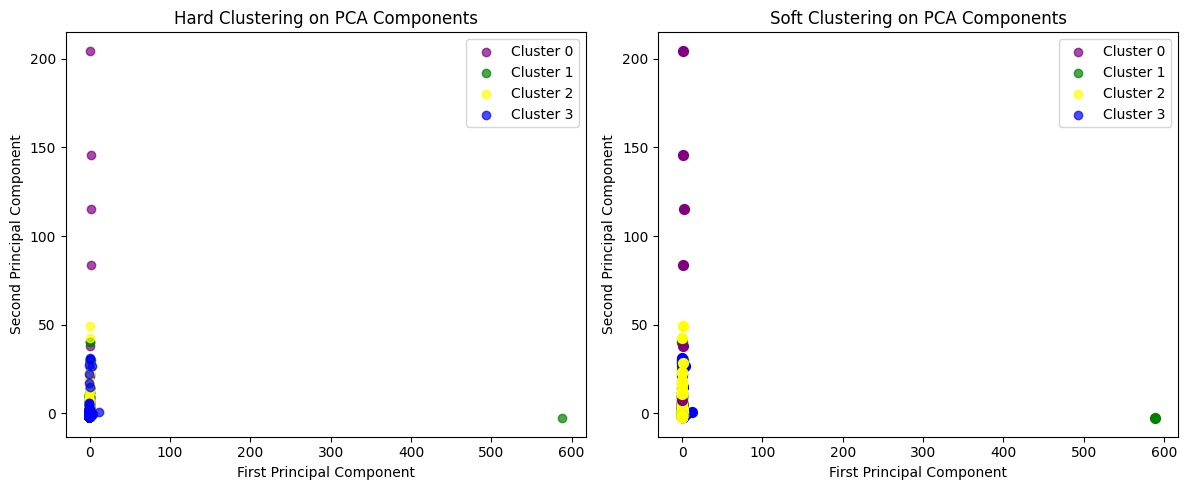

In [51]:
def perform_pca_visualization(X, hard_labels, soft_probs):
    """PCA visualization of clustering results"""
    print("=== Question 1 VI: PCA Visualization ===")
    
    # Apply PCA to reduce dimensionality from V features to 2 components
    # PCA finds the 2 directions of maximum variance
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Create plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    colors = ['purple', 'green', 'yellow', 'blue']
    
    # Plot 1: Hard clustering
    ax1.set_title('Hard Clustering on PCA Components')
    for k in range(4):
        mask = (hard_labels == k)
        if np.sum(mask) > 0:
            ax1.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[k], 
                       label=f'Cluster {k}', alpha=0.7)
    ax1.set_xlabel('First Principal Component')
    ax1.set_ylabel('Second Principal Component')
    ax1.legend()
    
    # Plot 2: Soft clustering (with transparency showing confidence)
    ax2.set_title('Soft Clustering on PCA Components')
    for i in range(len(X_pca)):
        cluster = np.argmax(soft_probs[i, :])
        confidence = soft_probs[i, cluster]
        ax2.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[cluster], 
                   alpha=confidence, s=50)
    
    # Add legend for soft clustering
    for k in range(4):
        ax2.scatter([], [], c=colors[k], label=f'Cluster {k}', alpha=0.7)
    ax2.set_xlabel('First Principal Component')
    ax2.set_ylabel('Second Principal Component')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    return X_pca

# Execute Question 1 VI
if __name__ == "__main__":
    X_pca = perform_pca_visualization(X, hard_labels, soft_probs)

### Discussion: Hard vs Soft Clustering Differences

Based on the PCA visualization plots above, we can observe key differences between hard clustering and soft clustering:

#### Visual Observations

##### Hard Clustering (Left Plot)
- Each document is assigned to **exactly one cluster** with a definitive color
- Points show discrete cluster assignments with uniform opacity
- Some spatial overlap exists where different colored points are close together

##### Soft Clustering (Right Plot)  
- Documents are colored by their **most probable cluster**
- **Transparency indicates confidence level** of cluster assignment
- More transparent points show **uncertainty** in cluster membership

#### How and Why They Are Different

##### 1. **Assignment Method**
- **Hard Clustering: Data points belong to only one cluster**
  - Uses argmax operation - assigns each document to the cluster with highest posterior probability
- **Soft Clustering: Data points could belong to one or more clusters and probability of belonging to each cluster is given**
   - Preserves the full posterior probability distribution and shows confidence through transparency

##### 2. **Information Content**
- **Hard Clustering**: Shows only the final discrete cluster assignment
- **Soft Clustering**: Shows both the assignment and the degree of certainty

##### 3. **Uncertainty Handling**
- **Hard Clustering**: Makes forced decisions even for ambiguous documents
- **Soft Clustering**: Explicitly reveals which documents are uncertain through transparency

#### Key Differences Observed

1. **Both plots show similar spatial distribution** of points (same PCA projection)
2. **Hard clustering hides uncertainty** - all points appear equally confident
3. **Soft clustering reveals uncertainty** - transparent points indicate documents near cluster boundaries
4. **The EM algorithm naturally produces soft assignments** - hard clustering discards the probability information

#### Conclusion

The visualization demonstrates that while both methods identify similar cluster structures, soft clustering provides additional insight into the **confidence and uncertainty** of assignments. This is particularly valuable for identifying documents that may belong to multiple topics or require further analysis.